# Quelques exemples simples d'utilisation d'OpenFisca

## Initialisation

Nous importons les modules nécéssaires et initialisons le système socio-fiscal.

In [1]:
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib.pyplot as plt
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances

In [3]:
import openfisca_france    # module décrivant le système socio-fiscal français
TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

Nous pouvont lister les entités pertinentes du système socio-fiscal 

In [4]:
print sorted(tax_benefit_system.entity_class_by_key_plural.keys())

['familles', 'foyers_fiscaux', 'individus', 'menages']


## Cas-types simples

### Le cas d'une personne seule

Nous créons le scénario correspondant à un cas-type très simple où ils n'existent qu'une seule entitée pour chaque entité composite considérée (famille, foyer_fiscal ou ménage).  

In [5]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    )
    ).new_simulation(debug = True)

ValueError: {'test_case': {'individus': {0: {'salbrut': u'Unexpected item'}}}} for: {'axes': None, 'input_variables': None, 'test_case': {'foyers_fiscaux': [{'personnes_a_charge': [], 'declarants': ['ind0'], 'id': 0}], 'individus': [{'salbrut': 24000, 'id': 'ind0', u'birth': datetime.date(1980, 1, 1)}], 'familles': [{'parents': ['ind0'], 'enfants': [], 'id': 0}], 'menages': [{'autres': [], 'enfants': [], 'personne_de_reference': 'ind0', 'id': 0}]}, 'period': Period((u'year', Instant((2014, 1, 1)), 1))}

Il est alors possible de calculer différentes variables, dont, à titre d'exemple, le revenu disponible.

In [6]:
simulation.calculate('revdisp')

NameError: name 'simulation' is not defined

Les variables représentant des montants "payés" par les ménages sont comptées négativement.   

In [7]:
simulation.calculate('cotisations_salariales')

NameError: name 'simulation' is not defined

Il est possible de faire des opérations et de calculer le taux de cotisations salariales.

In [8]:
abs(
    simulation.calculate('cotisations_salariales') 
    + simulation.calculate('csgsald') 
    + simulation.calculate('csgsali')
    + simulation.calculate('crdssal')
    )/simulation.calculate('salbrut')

NameError: name 'simulation' is not defined

### Le cas d'un couple biactif

In [9]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
        )
    ).new_simulation(debug = True)

ValueError: {'test_case': {'individus': {0: {'salbrut': u'Unexpected item'}, 1: {'salbrut': u'Unexpected item'}}}} for: {'axes': None, 'input_variables': None, 'test_case': {'foyers_fiscaux': [{'personnes_a_charge': [], 'declarants': ['ind0', 'ind1'], 'id': 0}], 'individus': [{'salbrut': 24000, 'id': 'ind0', u'birth': datetime.date(1980, 1, 1)}, {'salbrut': 24000, 'id': 'ind1', u'birth': datetime.date(1980, 1, 1)}], 'familles': [{'parents': ['ind0', 'ind1'], 'enfants': [], 'id': 0}], 'menages': [{'conjoint': 'ind1', 'autres': [], 'enfants': [], 'personne_de_reference': 'ind0', 'id': 0}]}, 'period': Period((u'year', Instant((2014, 1, 1)), 1))}

In [10]:
simulation.calculate('salnet')

NameError: name 'simulation' is not defined

In [11]:
simulation.calculate('revdisp')

NameError: name 'simulation' is not defined

In [12]:
simulation.calculate('impo')

NameError: name 'simulation' is not defined

### Le cas d'un couple biactif avec enfants

In [13]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
        ),
    parent2 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
        ),
    enfants = [
        dict(birth = date(2014 - 9, 1, 1)),
        dict(birth = date(2014 - 9, 1, 1)),
        ],
).new_simulation(debug = True)
    

In [14]:
simulation.calculate('revdisp')

array([ 45180.96484375], dtype=float32)

In [15]:
simulation.calculate('af')

array([ 1557.53991699], dtype=float32)

In [16]:
simulation.calculate('impo')

array([-3655.61181641], dtype=float32)

In [17]:
simulation.calculate('ars')

array([ 0.], dtype=float32)

## Cas types dont on fait varier certaines caractéristiques

### Cas d'une personne seule dont on fait varier le salaire

In [18]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 10,
            min = 0,
            max = 50000,
            name = 'salbrut',
            ),
        ],
    period = 2014,
    parent1 = dict(
        birth = date(1980, 1, 1),
        salbrut = 24000,
    )
    ).new_simulation(debug = True)

In [19]:
impot = simulation.calculate('impo')

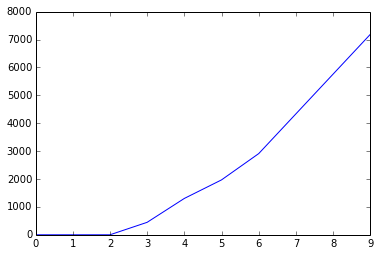

In [20]:
plt.plot(-impot)